# Projeto Final Big Data Science

## Análise exploratória microdados do ENEM 2021

**Autor** : Rubem Ribeiro

**E-mail**: rubem.ribeiro.b@gmail.com

## Introdução

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior. Desde 2020, o participante pode escolher entre fazer o exame impresso ou o Enem Digital, com provas aplicadas em computadores, em locais de prova definidos pelo Inep.

As notas do Enem podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superior portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais.

## Objetivos

Neste análise, será feito o estudo dos microdados do Enem do ano de 2021, que contém informações a respeito do desenpenho, análise econômica e social.
Link para os dados: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem.

##  Leitura e Tratamento dos Dados

### Importação das bibliotecas

In [1]:
import pandas as pd
import geopandas as gpd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set_theme()
%matplotlib inline

In [2]:
# Configuração de exibição
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12, 5)})

### Leitura dos dados

In [3]:
data = pd.read_csv(
    'MICRODADOS_ENEM_2021.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.01,
    sep=';'
)

**Por ser um arquivo grande, optei por carregar apenas uma parte dos dados.**

In [4]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210051934442,2021,11,M,1,1,1,1,9,1,...,B,A,A,B,B,A,D,A,B,B
1,210052916275,2021,4,F,1,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
2,210053050402,2021,11,M,2,2,1,1,11,1,...,A,A,A,B,A,A,B,A,A,B
3,210052482100,2021,13,M,0,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
4,210053888287,2021,4,F,1,3,1,1,0,1,...,A,A,A,B,B,B,E,B,A,B


## Manipulando o dataset

### Separando as colunas das notas

In [5]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
data[grades].head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN
1,534.2,608.5,476.8,570.2,640.0
2,NaN,NaN,NaN,NaN,NaN
3,552.1,633.7,528.2,484.5,540.0
4,430.6,451.6,476.3,493.0,620.0


### Retirando valores nulos

In [6]:
data[grades].isnull().sum()

NU_NOTA_LC         10152
NU_NOTA_CH         10152
NU_NOTA_CN         11498
NU_NOTA_MT         11498
NU_NOTA_REDACAO    10152
dtype: int64

In [7]:
data.dropna(inplace=True)

### Calculando a média geral de cada candidato

In [8]:
data['NU_NOTA_GERAL'] = data[grades].sum(axis=1) / 5

grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']

pd.DataFrame(data['NU_NOTA_GERAL'].head(10))

,NU_NOTA_GERAL
1,565.94
14,353.32
16,382.72
18,436.04
23,415.66
27,735.86
36,615.24
40,547.12
56,545.46
65,601.30


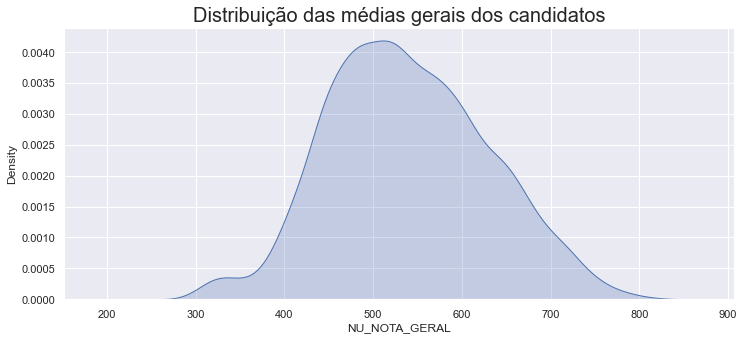

In [9]:
sns.kdeplot(data=data['NU_NOTA_GERAL'], fill=True, palette="rocket")

plt.title('Distribuição das médias gerais dos candidatos', fontsize=20)
plt.show()